# Loading the csv file present on kaggle
https://www.kaggle.com/datasets/nikhil1e9/loan-default?resource=download



In [ ]:
!pip install kagglehub  # Install kagglehub if not already installed
import kagglehub
import pandas as pd
import os


In [ ]:
# Download latest version of dataset
path = kagglehub.dataset_download("nikhil1e9/loan-default")

print("Path to dataset files:", path)


100%|██████████| 7.86M/7.86M [00:00<00:00, 70.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nikhil1e9/loan-default/versions/2


In [ ]:
import os

# Check downloaded files
files = os.listdir(path)
print("Files in dataset:", files)


Files in dataset: ['Loan_default.csv']


In [ ]:
csv_file = [f for f in files if f.endswith('.csv')][0]  # Find the CSV file
csv_path = os.path.join(path, csv_file)

# Load into pandas
df = pd.read_csv(csv_path)

# Display first few rows
df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Exploring data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
# checking value countds of each category in each object column
for col in df.select_dtypes(include=['object']).iloc[:, 1:].columns:
    print(col)
    print(df[col].value_counts())
    print()

Education
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

HasCoSigner
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64



# Balancing the target data

In [ ]:
# balancing target data
df['Default'].value_counts()

,count
Default,
0,225694
1,29653


In [ ]:
dfsyn = pd.read_csv("/content/Synthetic_Loan_Default.csv")

In [ ]:
dfsyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          25000 non-null  object 
 1   Age             25000 non-null  int64  
 2   Income          25000 non-null  int64  
 3   LoanAmount      25000 non-null  int64  
 4   CreditScore     25000 non-null  int64  
 5   MonthsEmployed  25000 non-null  int64  
 6   NumCreditLines  25000 non-null  int64  
 7   InterestRate    25000 non-null  float64
 8   LoanTerm        25000 non-null  int64  
 9   DTIRatio        25000 non-null  float64
 10  Education       25000 non-null  object 
 11  EmploymentType  25000 non-null  object 
 12  MaritalStatus   25000 non-null  object 
 13  HasMortgage     25000 non-null  object 
 14  HasDependents   25000 non-null  object 
 15  LoanPurpose     25000 non-null  object 
 16  HasCoSigner     25000 non-null  object 
 17  Default         25000 non-null 

In [ ]:
# selecting columns with object data types except for the first column
obj_cols=df.select_dtypes(include=['object']).iloc[:, 1:]
obj_syn = dfsyn.select_dtypes(include=['object']).iloc[:, 1:]

In [ ]:
# checking value countds of each category in each object column
for col in obj_cols:
    print(col)
    print(df[col].value_counts())
    print()

Education
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

HasCoSigner
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64



* Data seems to be equally distributed among each category for all the object columns

In [ ]:
labels = {'HasCoSigner':{'Yes':1,'No':0},'HasDependents':{'Yes':1,'No':0}, 'HasMortgage':{'Yes':1,'No':0}}
df = df.replace(labels)
dfsyn=dfsyn.replace(labels)
df = df.drop(['LoanID'], axis=1)
dfsyn = dfsyn.drop(['LoanID'], axis=1)
df

<ipython-input-28-00055752846f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(labels)
<ipython-input-28-00055752846f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfsyn=dfsyn.replace(labels)


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,0,Other,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,0,Home,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,1,Auto,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,1,1,Other,0,0


In [ ]:
df = pd.get_dummies(df, columns=['EmploymentType','MaritalStatus','LoanPurpose','Education'])
dfsyn = pd.get_dummies(dfsyn, columns=['EmploymentType','MaritalStatus','LoanPurpose','Education'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  int64  
 10  HasDependents                 255347 non-null  int64  
 11  HasCoSigner                   255347 non-null  int64  
 12  Default                       255347 non-nul

In [ ]:
dfsyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           25000 non-null  int64  
 1   Income                        25000 non-null  int64  
 2   LoanAmount                    25000 non-null  int64  
 3   CreditScore                   25000 non-null  int64  
 4   MonthsEmployed                25000 non-null  int64  
 5   NumCreditLines                25000 non-null  int64  
 6   InterestRate                  25000 non-null  float64
 7   LoanTerm                      25000 non-null  int64  
 8   DTIRatio                      25000 non-null  float64
 9   HasMortgage                   25000 non-null  int64  
 10  HasDependents                 25000 non-null  int64  
 11  HasCoSigner                   25000 non-null  int64  
 12  Default                       25000 non-null  int64  
 13  E

In [ ]:
dfsyn.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'EmploymentType_Full-time',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'Education_Bachelor's', 'Education_High School',
       'Education_Master's', 'Education_PhD'],
      dtype='object')

In [ ]:
corr = df.corrwith(df['Default'])
df1 = df[df['Default']==1]
# print(corr.sort_values(ascending=False))
df1.corr()-dfsyn.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD
Age,0.000000,-0.001926,-0.000204,0.007300,0.002452,-0.005592,0.008544,0.012144,0.002447,0.012501,...,-0.000826,-0.002079,0.003704,-0.004966,0.002223,0.001298,-0.000212,-0.009685,0.007104,0.003536
Income,-0.001926,0.000000,-0.002532,-0.001872,0.003635,-0.006882,0.004557,0.003423,0.002759,-0.001896,...,0.007664,0.003112,0.001807,-0.002206,0.002785,-0.005597,-0.001463,0.008370,-0.009185,0.001696
LoanAmount,-0.000204,-0.002532,0.000000,0.007440,0.006256,-0.005436,-0.000118,-0.001100,-0.002260,0.000190,...,0.003620,0.001289,-0.008076,0.010860,-0.006610,0.002267,0.003504,-0.003427,-0.001628,0.001571
CreditScore,0.007300,-0.001872,0.007440,0.000000,0.011344,-0.002770,0.005476,0.005928,-0.006374,-0.005005,...,-0.002872,-0.003594,-0.005513,-0.003617,0.005966,0.007121,0.011629,-0.014342,0.002938,0.000245
MonthsEmployed,0.002452,0.003635,0.006256,0.011344,0.000000,-0.008699,0.010401,0.003486,0.015194,-0.005725,...,0.003898,0.003836,0.005018,0.002006,-0.001841,-0.009149,0.001149,-0.003815,0.002422,0.000507
NumCreditLines,-0.005592,-0.006882,-0.005436,-0.002770,-0.008699,0.000000,-0.001863,0.008925,0.004310,-0.017844,...,-0.005975,0.009898,0.001738,0.002670,-0.001723,-0.012548,-0.010316,0.004897,0.005688,-0.000166
InterestRate,0.008544,0.004557,-0.000118,0.005476,0.010401,-0.001863,0.000000,-0.003123,0.002503,-0.006394,...,0.000543,-0.005763,-0.004104,0.006766,0.000059,0.003201,-0.007690,-0.005072,0.002444,0.010975
LoanTerm,0.012144,0.003423,-0.001100,0.005928,0.003486,0.008925,-0.003123,0.000000,-0.010243,0.002664,...,-0.005661,-0.005764,-0.002730,0.014959,-0.005051,-0.001617,-0.007672,0.000006,0.000107,0.007998
DTIRatio,0.002447,0.002759,-0.002260,-0.006374,0.015194,0.004310,0.002503,-0.010243,0.000000,-0.004977,...,-0.009786,0.000461,0.007758,0.000659,-0.003451,-0.005604,0.005207,-0.011640,0.003198,0.003799
HasMortgage,0.012501,-0.001896,0.000190,-0.005005,-0.005725,-0.017844,-0.006394,0.002664,-0.004977,0.000000,...,-0.009255,-0.000121,-0.014298,-0.000184,0.015648,-0.000323,0.007967,-0.004873,-0.000853,-0.002325


In [ ]:
# df = df+dfsyn
print(df.shape)
print(dfsyn.shape)

(255347, 29)
(25000, 29)


In [ ]:
df.Default.value_counts()

,count
Default,
0,225694
1,29653


In [ ]:
# append rows of dfsyn in df
df = pd.concat([df, dfsyn], ignore_index=True)
df.shape

(280347, 29)

In [ ]:
df.Default.value_counts()

,count
Default,
0,225694
1,54653


In [ ]:
# balancing data based on the target variable
df_majority = df[df.Default==0]
df_minority = df[df.Default==1]

In [ ]:
df_minority.shape

(54653, 29)

In [ ]:
df_majority.shape

(225694, 29)

In [ ]:
df_majority_downsampled = df_majority.sample(n=df_minority.shape[0])

In [ ]:
df_majority_downsampled.shape

(54653, 29)

In [ ]:

dfnew=pd.concat([df_majority_downsampled,df_minority])

In [ ]:
dfnew.shape

(109306, 29)

Age


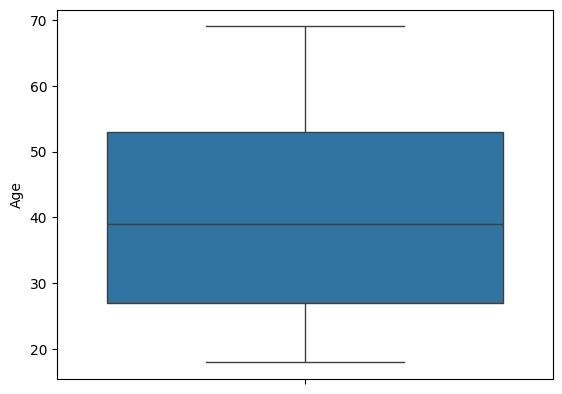

0.24621637502945906
-1.127727081538775

Income


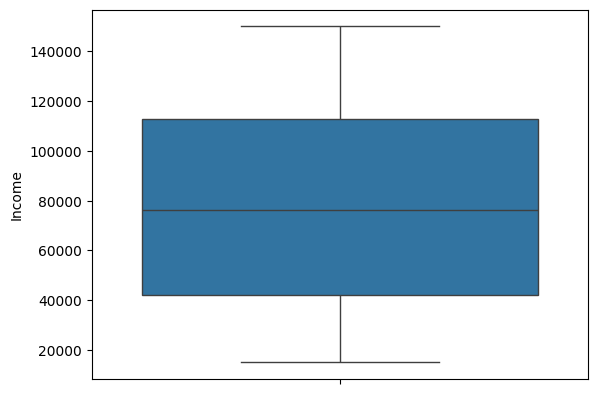

0.1104624924531669
-1.2316830121599815

LoanAmount


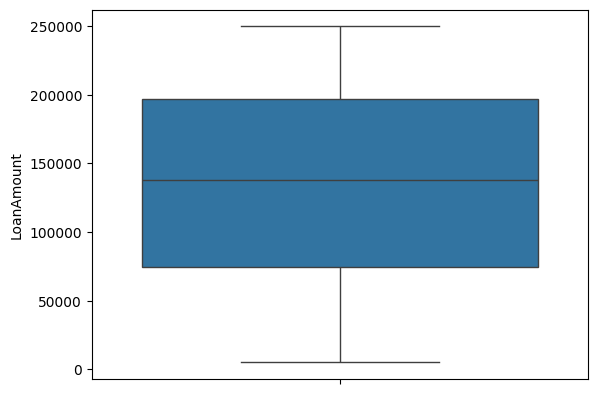

-0.12160488647471493
-1.1899859796773842

CreditScore


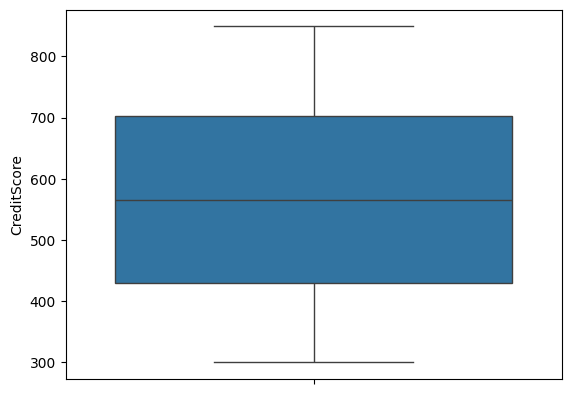

0.04860178900052621
-1.1874520078045234

MonthsEmployed


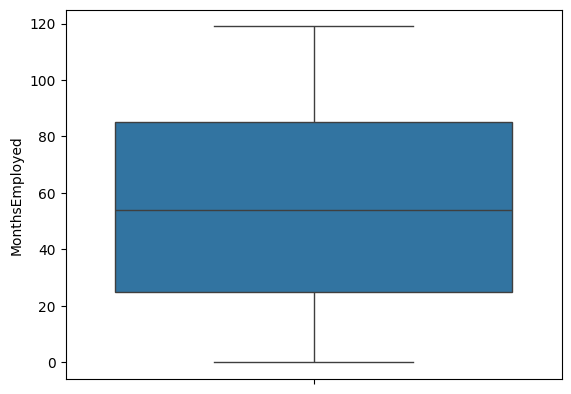

0.13571232464668895
-1.1839929192791314

NumCreditLines


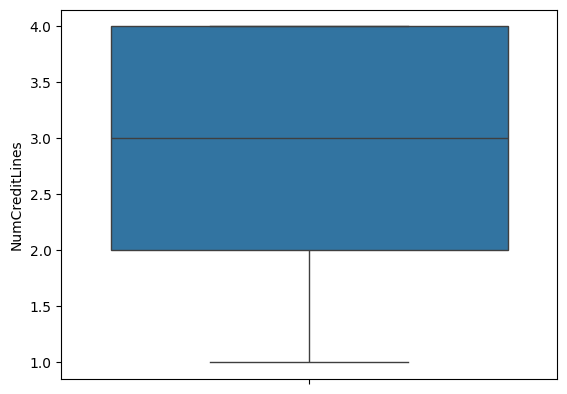

-0.04439741776817633
-1.361925741073951

InterestRate


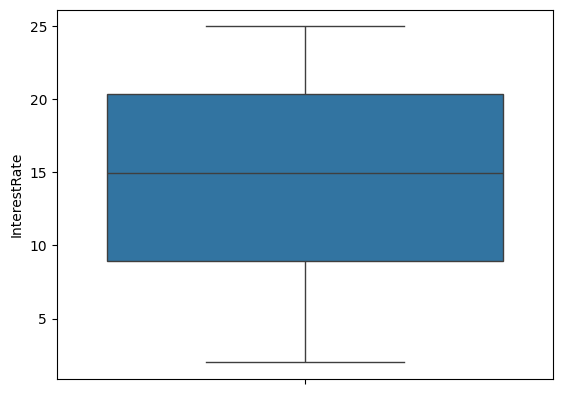

-0.18208401900233737
-1.1594901816555343

LoanTerm


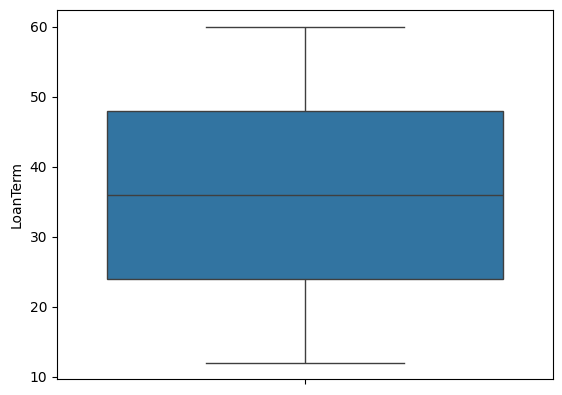

-0.008235814068246715
-1.3044406998664526

DTIRatio


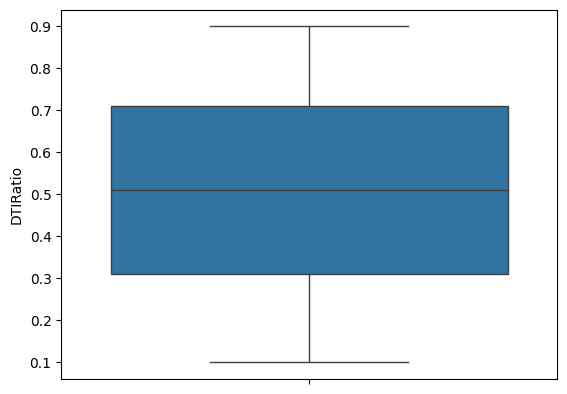

-0.027587843484491528
-1.1924369712837504

HasMortgage


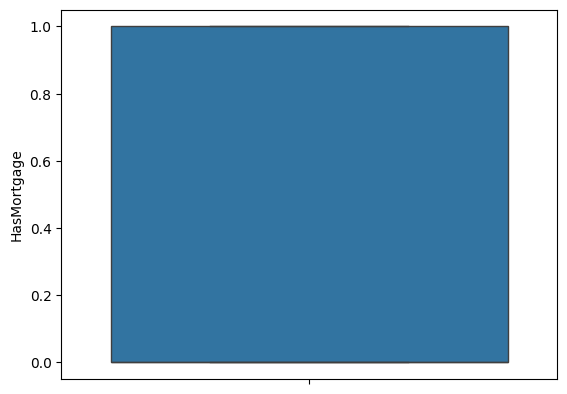

0.05326462847446312
-1.9971994229598802

HasDependents


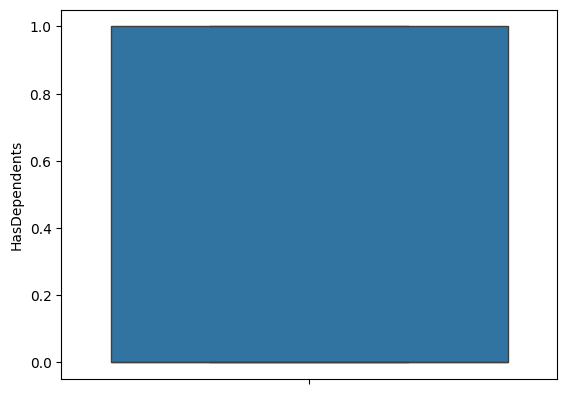

0.07877691743262025
-1.9938306792474456

HasCoSigner


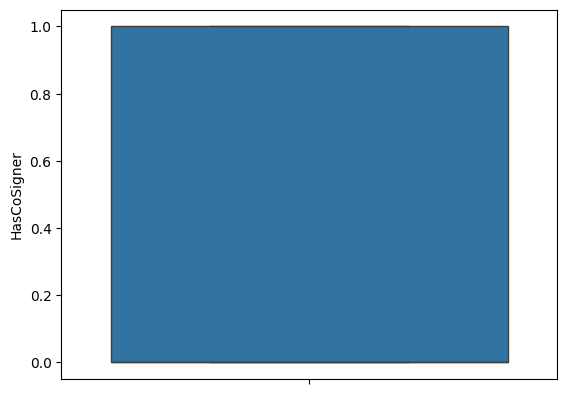

0.0922809181103213
-1.9915206718535485



In [ ]:
# checking outliers using boxplot,skewness and kutrosis in a for loop
import seaborn as sns
import matplotlib.pyplot as plt
for col in dfnew.select_dtypes(include=['int64','float64']).iloc[:,:-1].columns:
    print(col)
    sns.boxplot(dfnew[col])
    plt.show()
    print(dfnew[col].skew())
    print(dfnew[col].kurtosis())
    print()

* From above plots its clear that we do not have any outliers

#Understanding Data Patterns

In [ ]:
#correlations between all columns
corr = dfnew.corr()
# corr=corr[(corr>0.1)&(corr<-0.1)]
# corr=corr.drop(['Default'])
# Sort the correlations by absolute value
high_corr = corr.abs().unstack().sort_values(ascending=False)
# Remove duplicate pairs (e.g., A with B and B with A)
high_corr = high_corr[high_corr < 0.1]

# Display the top correlated pairs
top_corr = high_corr  # Adjust the number of pairs as needed
print(top_corr)



Income                        LoanAmount                      0.070811
LoanAmount                    Income                          0.070811
EmploymentType_Full-time      Default                         0.064593
Default                       EmploymentType_Full-time        0.064593
HasCoSigner                   Default                         0.063925
                                                                ...   
EmploymentType_Self-employed  LoanPurpose_Auto                0.000026
                              HasMortgage                     0.000023
HasMortgage                   EmploymentType_Self-employed    0.000023
MaritalStatus_Single          Income                          0.000017
Income                        MaritalStatus_Single            0.000017
Length: 752, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


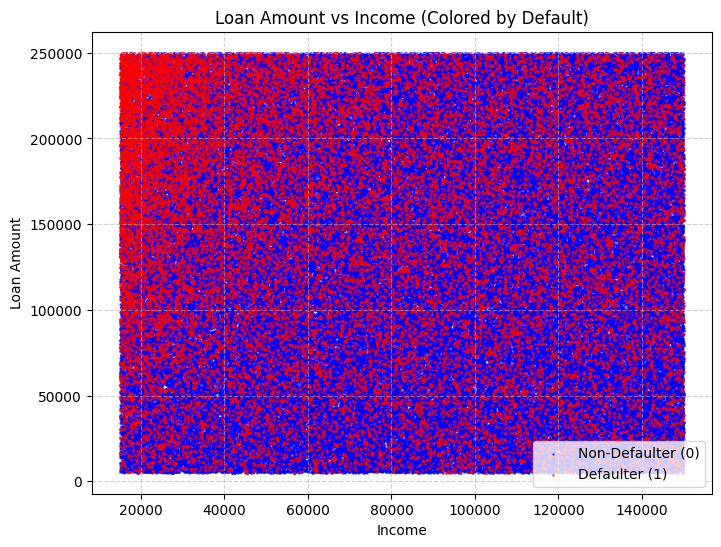

In [ ]:
# Create scatter plot
df=dfnew
plt.figure(figsize=(8, 6))
plt.scatter(df[df["Default"] == 0]["Income"], df[df["Default"] == 0]["LoanAmount"],
            label="Non-Defaulter (0)", alpha=0.5, s=1, color="blue")
plt.scatter(df[df["Default"] == 1]["Income"], df[df["Default"] == 1]["LoanAmount"],
            label="Defaulter (1)", alpha=0.5, s=1, color="red")

# Labels and title
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Income (Colored by Default)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


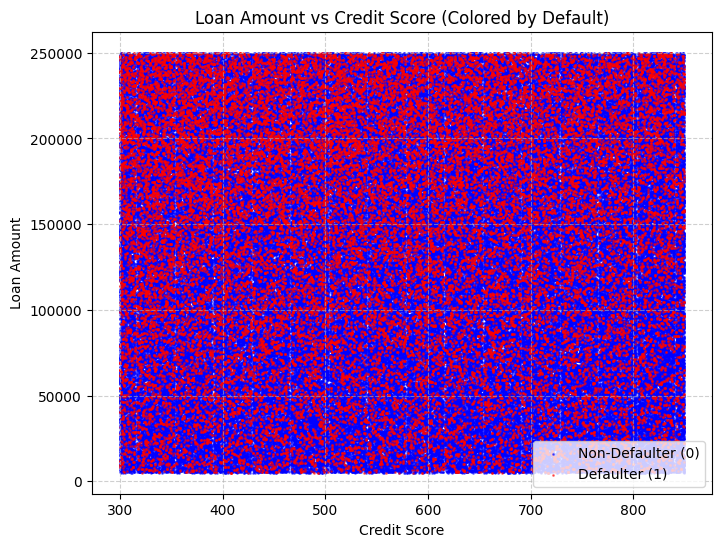

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[df["Default"] == 0]["CreditScore"], df[df["Default"] == 0]["LoanAmount"],
            label="Non-Defaulter (0)", alpha=0.5, s=1, color="blue")
plt.scatter(df[df["Default"] == 1]["CreditScore"], df[df["Default"] == 1]["LoanAmount"],
            label="Defaulter (1)", alpha=0.5, s=1, color="red")

# Labels and title
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Credit Score (Colored by Default)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


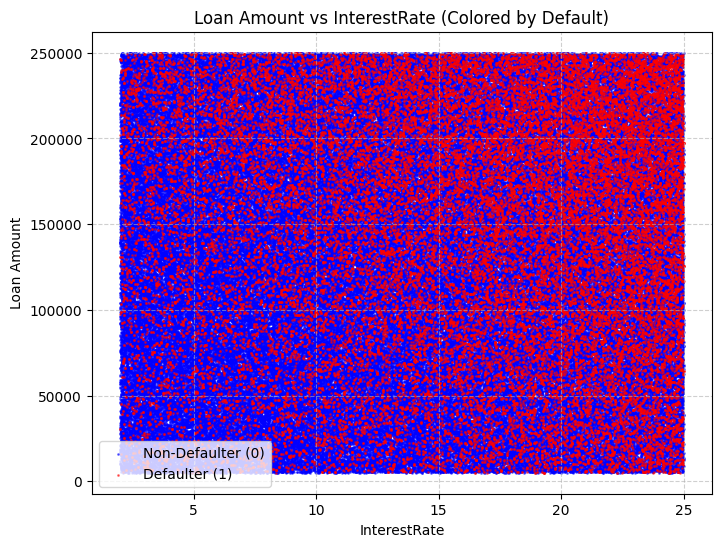

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[df["Default"] == 0]["InterestRate"], df[df["Default"] == 0]["LoanAmount"],
            label="Non-Defaulter (0)", alpha=0.5, s=1, color="blue")
plt.scatter(df[df["Default"] == 1]["InterestRate"], df[df["Default"] == 1]["LoanAmount"],
            label="Defaulter (1)", alpha=0.5, s=1, color="red")

# Labels and title
plt.xlabel("InterestRate")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs InterestRate (Colored by Default)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


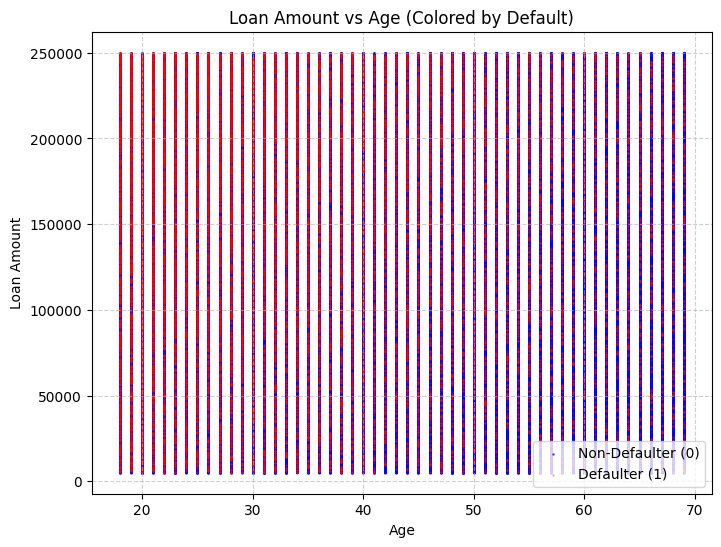

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[df["Default"] == 0]["Age"], df[df["Default"] == 0]["LoanAmount"],
            label="Non-Defaulter (0)", alpha=0.5, s=1, color="blue")
plt.scatter(df[df["Default"] == 1]["Age"], df[df["Default"] == 1]["LoanAmount"],
            label="Defaulter (1)", alpha=0.5, s=0.2, color="red")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Age (Colored by Default)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


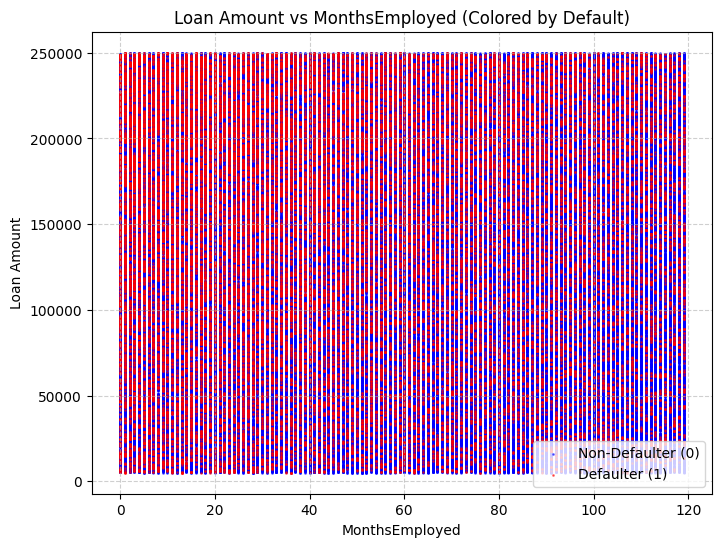

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[df["Default"] == 0]["MonthsEmployed"], df[df["Default"] == 0]["LoanAmount"],
            label="Non-Defaulter (0)", alpha=0.5, s=1, color="blue")
plt.scatter(df[df["Default"] == 1]["MonthsEmployed"], df[df["Default"] == 1]["LoanAmount"],
            label="Defaulter (1)", alpha=0.5, s=1, color="red")

# Labels and title
plt.xlabel("MonthsEmployed")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs MonthsEmployed (Colored by Default)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


In [ ]:
X = dfnew.drop(['Default'], axis=1)
y = dfnew['Default']

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38,stratify=y)


In [ ]:
models = [
    CatBoostClassifier(iterations=300, verbose=False, early_stopping_rounds=10),
    XGBClassifier(n_estimators=300, early_stopping_rounds=10),
    RandomForestClassifier(n_estimators=300,max_depth=50),
    LogisticRegression(solver='saga', max_iter=300),
    KNeighborsClassifier(),
    GaussianNB()

]

# Train and evaluate models
for model in models:
    if isinstance(model, (XGBClassifier, CatBoostClassifier)):
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_name = model.__class__.__name__
    print(f'{model_name} - Report: ')
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Accuracy: {accuracy * 100:.2f}%")

CatBoostClassifier - Report: 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     13663
           1       0.70      0.69      0.70     13664

    accuracy                           0.70     27327
   macro avg       0.70      0.70      0.70     27327
weighted avg       0.70      0.70      0.70     27327

Accuracy: 69.89%
XGBClassifier - Report: 
              precision    recall  f1-score   support

           0       0.75      0.72      0.74     13663
           1       0.73      0.76      0.75     13664

    accuracy                           0.74     27327
   macro avg       0.74      0.74      0.74     27327
weighted avg       0.74      0.74      0.74     27327

Accuracy: 74.29%
RandomForestClassifier - Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     13663
           1       0.81      0.84      0.83     13664

    accuracy                           0.82     27327
   ma

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression - Report: 
              precision    recall  f1-score   support

           0       0.58      0.61      0.59     13663
           1       0.59      0.57      0.58     13664

    accuracy                           0.59     27327
   macro avg       0.59      0.59      0.59     27327
weighted avg       0.59      0.59      0.59     27327

Accuracy: 58.62%
KNeighborsClassifier - Report: 
              precision    recall  f1-score   support

           0       0.61      0.57      0.59     13663
           1       0.60      0.63      0.61     13664

    accuracy                           0.60     27327
   macro avg       0.60      0.60      0.60     27327
weighted avg       0.60      0.60      0.60     27327

Accuracy: 60.21%
GaussianNB - Report: 
              precision    recall  f1-score   support

           0       0.68      0.65      0.66     13663
           1       0.67      0.69      0.68     13664

    accuracy                           0.67     27327
   macro a

# Selected random Forest of all the tested models and saving its weights

In [ ]:
model = RandomForestClassifier(n_estimators=300,max_depth=50)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=300)

In [ ]:
model.save_model('loan_defaulter_randomforest')

AttributeError: 'RandomForestClassifier' object has no attribute 'save_model'

In [ ]:
import joblib

# Save model again
# joblib.dump(model, 'random_forest_modelv2')

# # Load model
# newmodel = joblib.load('random_forest_modelv2')


In [ ]:
import numpy as np
# arr = np.array(X_test.iloc[0])

In [ ]:
arr

In [ ]:
y_test.iloc[1]

In [ ]:
import numpy as np
import pandas as pd
l=[35, 71950, 126489, 577, 116, 2, 13.12, 60, 0.43, 1, 1, 0, True,
       False, False, False, False, True, False, False, True, False, False,
       False, False, False, True, False]

In [ ]:
inp=np.array(l)

In [ ]:
pred=newmodel.predict(inp.reshape(1,-1))

In [ ]:
pred

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(newmodel)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for the first prediction
shap.initjs()  # Initialize JS for visualizations
shap.summary_plot(shap_values[1], X_test)  # 1 corresponds to the class you want to analyze (change as needed)


In [ ]:
import sklearn
print("pandas: ",pd.__version__)
print("numpy: ",np.__version__)
# print("shap: ",shap.__version__)
print("sklearn: ",sklearn.__version__)
print("xgboost: ",xgboost.__version__)

print("joblib: ",joblib.__version__)


pandas:  2.2.2
numpy:  1.26.4
sklearn:  1.6.1
joblib:  1.4.2


In [ ]:
import xgboost
import catboost
print("xgboost: ",xgboost.__version__)
print("catboost: ",catboost.__version__)

xgboost:  2.1.3
catboost:  1.2.7


In [ ]:
# pip install flask pandas==2.2.2 numpy==1.26.4 scikit-learn==1.5.2 joblib==1.4.2 shap==0.46.0 gunicorn==